# Group Assignment 1.7: Distribution Fitting

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px; height: auto; margin: 0" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px; height: auto; margin: 0" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 7, Friday Oct 18, 2024.*

## Case 2: $CO_2$ emissions from traffic

**What's the propagated uncertainty? *How large will be the $CO_2$ emissions?***

In this project, you have chosen to work on the uncertainty of the number of cars and heavy vehicles to estimate their $CO_2$ emissions. You have observations every five minutes of the number of cars, $C$, and the number of heavy vehicles, $H$ (more on the dataset [here](https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset)). As you know, traffic is an important source of $CO_2$ emissions that contribute to the greenhouse effect. Here, the emitted $CO_2$ will be estimated for a trip of 1km using the emissions intensities from [Nishimura and Haga (2023)](https://sumitomoelectric.com/sites/default/files/2023-10/download_documents/E97-03.pdf), assuming that the cars use gasolite as fuel and the heavy vehicles, diesel. Emissions can be computed as 

$$
CO2 = 143 C + 469 H
$$

**The goal of this project is:**
1. Choose a reasonable distribution function for $H$ and $C$.
2. Fit the chosen distributions to the observations of $H$ and $C$.
3. Assuming $H$ and $C$ are independent, propagate their distributions to obtain the distribution of emissions of $CO_2$.
4. Analyze the distribution of emissions of $CO_2$.

## Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats 
from math import ceil, trunc

plt.rcParams.update({'font.size': 14})

## 1. Explore the data

First step in the analysis is exploring the data, visually and through its statistics.

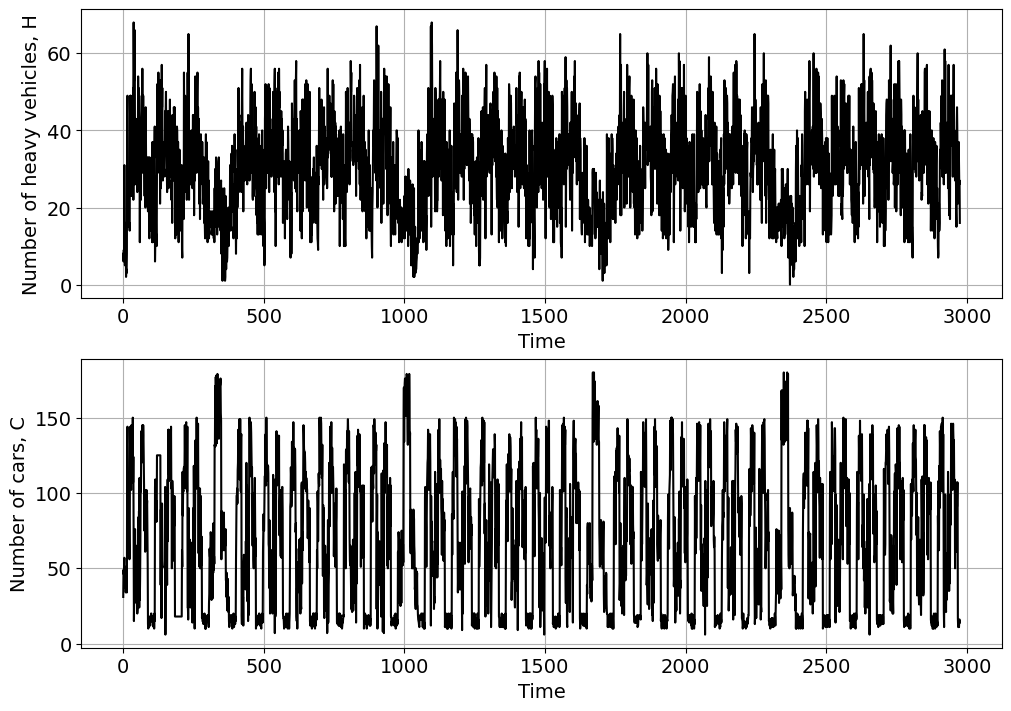

In [2]:
# Import
C, H = np.genfromtxt('dataset_traffic.csv', delimiter=",", unpack=True, skip_header=True)

# plot time series
fig, ax = plt.subplots(2, 1, figsize=(10, 7), layout = 'constrained')
ax[0].plot(H,'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Number of heavy vehicles, H')
ax[0].grid()

ax[1].plot(C,'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Number of cars, C')
ax[1].grid()

In [28]:
# Statistics for H

print(stats.describe(H))
stats.describe(H).mean

DescribeResult(nobs=2976, minmax=(np.float64(0.0), np.float64(68.0)), mean=np.float64(30.604502688172044), variance=np.float64(151.77932761814404), skewness=np.float64(0.12898824408904086), kurtosis=np.float64(-0.4573152711666002))


In [4]:
# Statistics for d

print(stats.describe(C))

DescribeResult(nobs=2976, minmax=(np.float64(6.0), np.float64(180.0)), mean=np.float64(68.69657258064517), variance=np.float64(2102.2860521143944), skewness=np.float64(0.29528679621238874), kurtosis=np.float64(-1.1608245630406528))


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>  

Describe the data based on the previous statistics:
- Which variable presents a higher variability?</li>
- What does the skewness coefficient means? Which kind of distribution functions should we consider to fit them?</li>
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- $C$ presents a higher variance but also a higher mean. If we compute the coefficient of variation to standardize that variability, we obtain $CV(H)=151.8/30.6 = 4.96$ and $CV(C)= 2102.3/68.7 = 30.6$. Thus, $C$ has higher variability than $H$.</li>
- Both $H$ and $C$ have a positive skewness, but close to zero. Thus, the data does not seem to present a clear right tail so we could assume that their distribution is symmetric. An appropriate distribution for $H$ and $C$ would be one which: (1) it is bounded in 0 (no negative values of $H$ or $C$ are physically possible), and (2) is symmetric. If we consider the distributions that you have been introduced to, Uniform or Gaussian (although this is not bounded) would be a possibility</li>
</div>
</div>

## 2. Empirical distribution functions

Now, we are going to compute and plot the empirical PDF and CDF for each variable. Note that you have the pseudo-code for the empirical CDF in the [reader](https://mude.citg.tudelft.nl/book/probability/empirical.html).

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>   

Define a function to compute the empirical CDF. Plot the empirical PDF and CDF.
</p>
</div>

In [5]:
def ecdf(var):
    x = np.sort(var) # sort the values from small to large
    n = x.size # determine the number of datapoints
    y = np.arange(1, n+1) / (n+1)
    return [y, x]

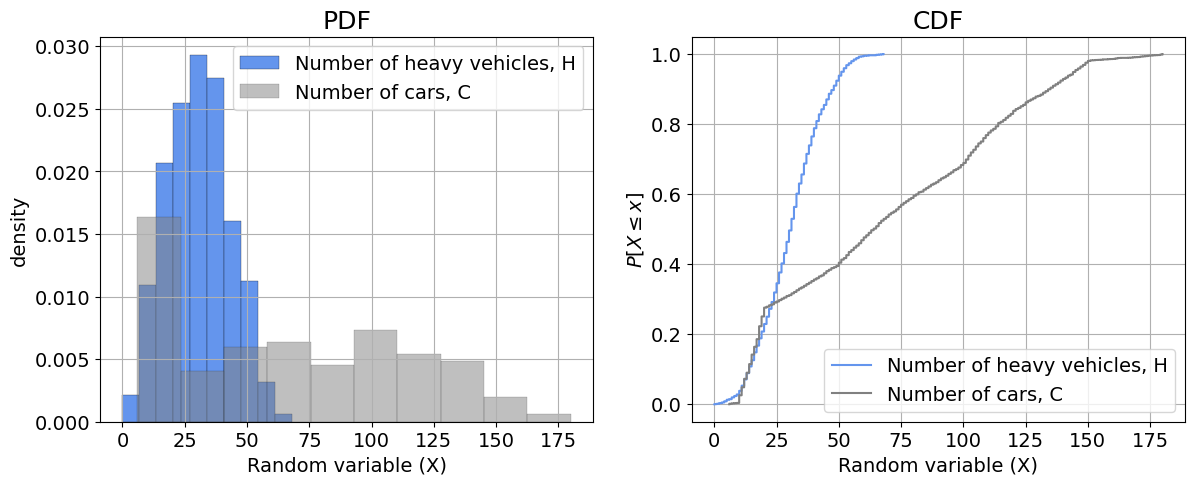

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(H, edgecolor='k', linewidth=0.2, 
             color='cornflowerblue', label='Number of heavy vehicles, H', density = True)
axes[0].set_xlabel('Random variable (X)')
axes[0].set_ylabel('density')
axes[0].hist(C, edgecolor='k', linewidth=0.2, alpha = 0.5, 
             color='grey', label='Number of cars, C', density = True)
axes[0].set_title('PDF', fontsize=18)
axes[0].grid()
axes[0].legend()

axes[1].step(ecdf(H)[1], ecdf(H)[0], 
             color='cornflowerblue', label='Number of heavy vehicles, H')
axes[1].set_xlabel('Random variable (X)')
axes[1].set_ylabel('${P[X \\leq x]}$')
axes[1].step(ecdf(C)[1], ecdf(C)[0], 
             color='grey', label='Number of cars, C')
axes[1].set_title('CDF', fontsize=18)
axes[1].legend()
axes[1].grid()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   

Based on the results of Task 1 and the empirical PDF and CDF, select <b>one</b> distribution to fit to each variable. For $H$, select between Gumbel or Gaussian distribution, while for $C$ choose between Uniform or Lognormal.
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

$H$: Gaussian
$C$: Uniform
</div>
</div>

## 3. Fitting a distribution

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>   

Fit the selected distributions to the observations using MLE.
</p>
</div>

Hint: Use [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) built in functions (watch out with the parameters definition!).

In [7]:
params_H = stats.norm.fit(H)
params_C = stats.uniform.fit(C)

## 4. Assessing goodness of fit

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>   

Assess the goodness of fit of the selected distribution using:
- One graphical method: QQplot or Logscale. Choose one.</li>
- Kolmogorov-Smirnov test.</li>
</p>
</div>

Hint: You have Kolmogorov-Smirnov test implemented in [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html).

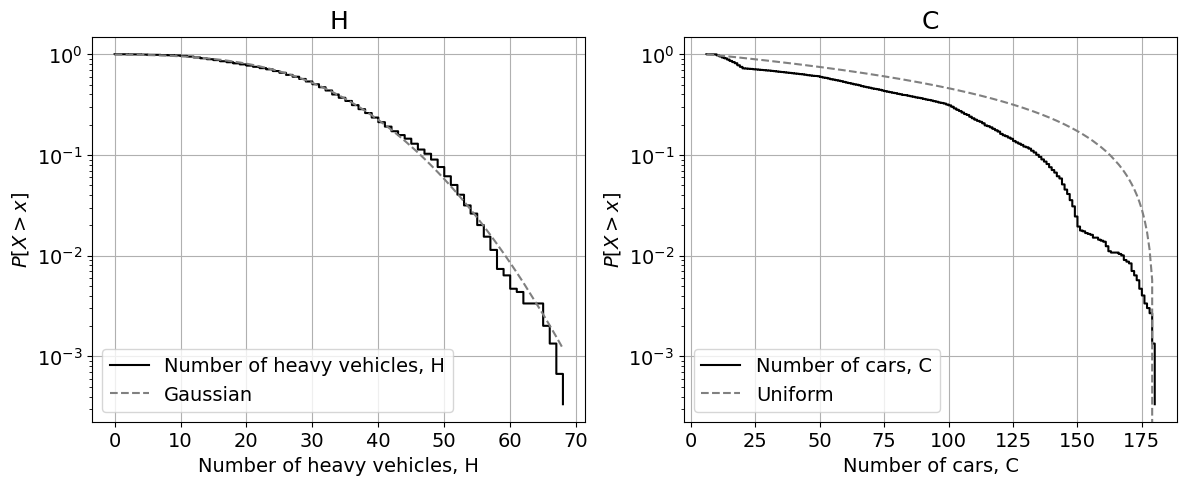

In [30]:
#Graphical method

#Logscale

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].step(ecdf(H)[1], 1-ecdf(H)[0], 
             color='k', label='Number of heavy vehicles, H')
axes[0].plot(ecdf(H)[1], 1-stats.norm.cdf(ecdf(H)[1], *params_H),
             '--', color = 'grey', label='Gaussian')
axes[0].set_xlabel('Number of heavy vehicles, H')
axes[0].set_ylabel('${P[X > x]}$')
axes[0].set_title('H', fontsize=18)
axes[0].set_yscale('log')
axes[0].legend()
axes[0].grid()

axes[1].step(ecdf(C)[1], 1-ecdf(C)[0], 
             color='k', label='Number of cars, C')
axes[1].plot(ecdf(C)[1], 1-stats.uniform.cdf(ecdf(C)[1], *params_C),
             '--', color = 'grey', label='Uniform')
axes[1].set_xlabel('Number of cars, C')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('C', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid()

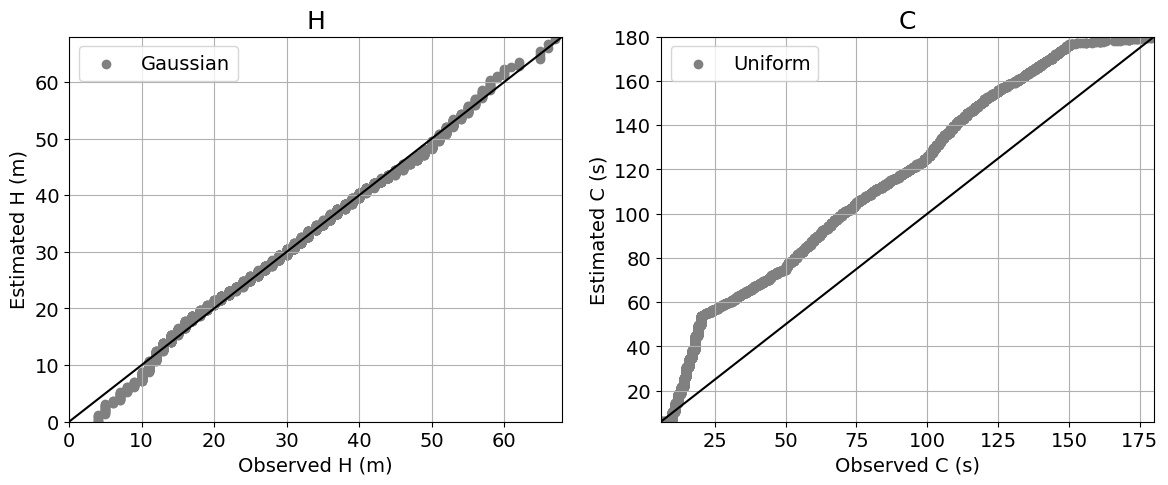

In [9]:
# QQplot

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot([trunc(min(H)), ceil(max(H))], [trunc(min(H)), ceil(max(H))], 'k')
axes[0].scatter(ecdf(H)[1], stats.norm.ppf(ecdf(H)[0], *params_H), 
             color='grey', label='Gaussian')
axes[0].set_xlabel('Observed H (m)')
axes[0].set_ylabel('Estimated H (m)')
axes[0].set_title('H', fontsize=18)
axes[0].set_xlim([trunc(min(H)), ceil(max(H))])
axes[0].set_ylim([trunc(min(H)), ceil(max(H))])
axes[0].legend()
axes[0].grid()

axes[1].plot([trunc(min(C)), ceil(max(C))], [trunc(min(C)), ceil(max(C))], 'k')
axes[1].scatter(ecdf(C)[1], stats.uniform.ppf(ecdf(C)[0], *params_C), 
             color='grey', label='Uniform')
axes[1].set_xlabel('Observed C (s)')
axes[1].set_ylabel('Estimated C (s)')
axes[1].set_title('C', fontsize=18)
axes[1].set_xlim([trunc(min(C)), ceil(max(C))])
axes[1].set_ylim([trunc(min(C)), ceil(max(C))])
axes[1].legend()
axes[1].grid()

In [10]:
#KStest

_, p_H = stats.kstest(H,stats.norm.cdf, args=params_H)
_, p_C = stats.kstest(C,stats.uniform.cdf, args=params_C)

print('The p-value for the fitted Gaussian distribution to H is:', round(p_H, 3))
print('The p-value for the fitted Uniform distribution to C is:', round(p_C, 3))

The p-value for the fitted Gaussian distribution to H is: 0.001
The p-value for the fitted Uniform distribution to C is: 0.0


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6:</b>   

Interpret the results of the GOF techniques. How does the selected parametric distribution perform?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- Logscale plot: This technique allows to visually assess the fitting of the parametric distribution to the tail of the empirical distribution. We can confirm here that $H$ and $C$ present pretty symmetric distributions, as Gaussian and Uniform distribution capture pretty well the behavior in the tail. </li>
- QQplot: Gaussian distribution provides a very good fitting for $H$ regardless if we are analyzing the central moments or the tails. On the contrary, Uniform distribution performs poorly for $C$ as the observations are far from the 45-degrees line all along the analyzed range of values.</li>
- Kolmogorov-Smirnov test: remember that the test statistic measures the difference between two distributions. The p-value then represents the probability of observing a difference at least that large for a sample from the assumed distribution. If p-value is lower than the significance ($\alpha=0.05$, for instance), the null hypothesis is rejected. Considering here $\alpha=0.05$, we can reject that the variable $H$ comes from a Gaussian distribution and that $C$ comes from a Uniform distribution. However, visually, the Gaussian distribution seems a pretty good fit for $H$.</li>
</div>
</div>

## 5. Propagating the uncertainty

Using the fitted distributions, we are going to propagate the uncertainty from $H$ and $C$ to the emissions of $CO_2$ **assuming that $H$ and $C$ are independent**.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7:</b>   
    
1. Draw 10,000 random samples from the fitted distribution functions for $H$ and $C$.
    
2. Compute emissions of $CO_2$ for each pair of samples.
    
3. Compute emissions of $CO_2$ for the observations.
    
4. Plot the PDF and exceedance curve in logscale of the emissions of $CO_2$ computed using both the simulations and the observations.
</p>
</div>

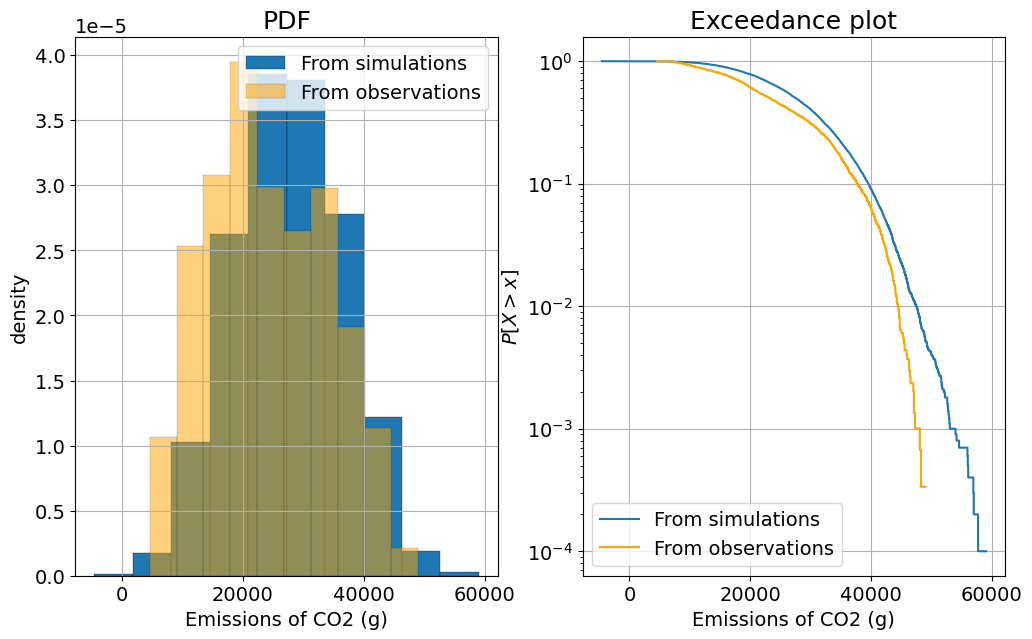

In [11]:
# Here, the solution is shown for the Lognormal distribution

# Draw random samples
rs_H = stats.norm.rvs(*params_H, size = 10000)
rs_C = stats.uniform.rvs(*params_C, size = 10000)

#Compute Fh
rs_CO2 = 469 * rs_H + 143 * rs_C

#repeat for observations
CO2 = 469 * H + 143 * C

#plot the PDF and the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
axes[0].hist(rs_CO2, edgecolor='k', linewidth=0.2, density = True, label = 'From simulations')
axes[0].hist(CO2, edgecolor='k', facecolor = 'orange', alpha = 0.5, linewidth=0.2, 
             density = True, label = 'From observations')
axes[0].set_xlabel('Emissions of CO2 (g)')
axes[0].set_ylabel('density')
axes[0].set_title('PDF', fontsize=18)
axes[0].legend()
axes[0].grid()

axes[1].step(ecdf(rs_CO2)[1], 1-ecdf(rs_CO2)[0], label = 'From simulations')
axes[1].step(ecdf(CO2)[1], 1-ecdf(CO2)[0], color = 'orange', label = 'From observations')
axes[1].set_xlabel('Emissions of CO2 (g)')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('Exceedance plot', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8:</b>   

Interpret the figures above, answering the following questions:
    <li>Are there differences between the two computed distributions for $F_h$?</li>
    <li>What are the advantages and disadvantages of using the simulations?</li>
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- In the PDF plot, we can see that the shape of the distribution is similar although the mode of the simulations is higher than that of the observations. In the CDF plot, we can also see that shift of the distribution of $CO2$ towards higher values when using the simulations. Thus, for the same probability, higher values of $CO2$ would be obtained from the simulated distribution being on the safety side. </li>
- <b>Disadvantages:</b> we are assuming that $H$ and $C$ are independent (we will see how to address this issue next week). But is that true? Also, the results are conditioned to how good model is the selected parametric distribution. In this case, since the Uniform distribution performs poorly for $C$, the obtained distribution for $CO2$ deviates from the one obtained from the observations. <b>Advantages:</b> I can draw all the samples I want allowing the computation of events I have not observed yet (extreme events).</li>
</div>
</div>

If you run the code in the cell below, you will obtain a scatter plot of both variables. Explore the relationship between both variables and answer the following questions:

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9:</b>   
    
1. Observe the plot below. What differences do you observe between the generated samples and the observations?
    
2. Compute the correlation between $H$ and $C$ for the samples and for the observartions. Are there differences?
    
3. What can you improve into the previous analysis? Do you have any ideas/suggestions on how to implement those suggestions?
</p>
</div>

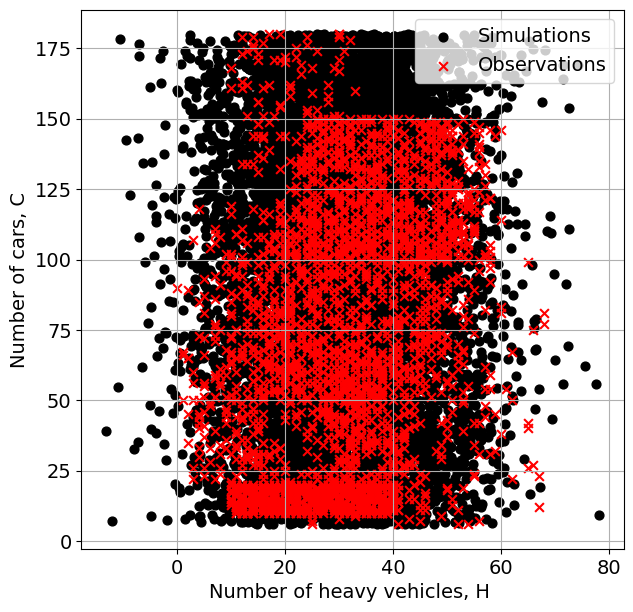

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
axes.scatter(rs_H, rs_C, 40, 'k', label = 'Simulations')
axes.scatter(H, C, 40, 'r','x', label = 'Observations')
axes.set_xlabel('Number of heavy vehicles, H ')
axes.set_ylabel('Number of cars, C')
axes.legend()
axes.grid()

In [13]:
#Correlation
correl = stats.pearsonr(H, C)
correl_rs = stats.pearsonr(rs_H, rs_C)
print('The correlation between the observations is:', correl[0])
print('The correlation between the simulations is:', correl_rs[0])

The correlation between the observations is: 0.2660768676548393
The correlation between the simulations is: -0.013637688852272484


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- The observations are focussed in an area of the plot while the simulations are a bit more spread around. This is because the observations are dependent on each other, there is a physical relationship between the number of cars and the number of trucks, while the simulations are assumed to be independent. Moreover, negative numbers for the number of vehicles are sampled, which do not have a physical meaning. </li>
- There is a correlation of 0.27 between the observed $H$ and $C$, indicating dependence between the variables. On the contrary, no significant correlation between the generated samples is observed.</li>
- <b>Some suggestions:</b> Improve the fit of $C$ with a different distribution. Account for the dependence between the two variables. </li>
</div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.